In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [23]:
main_football_data = pd.read_csv("MAIN_football.csv", sep=';', encoding='ISO-8859-1')

In [30]:
main_football_data['men_rank'] = main_football_data['men_rank'].astype(str).str.replace(',', '.').astype(float, errors='ignore')
main_football_data['women_rank'] = main_football_data['women_rank'].astype(str).str.replace(',', '.').astype(float, errors='ignore')
main_football_data['gii'] = main_football_data['gii'].astype(str).str.replace(',', '.').astype(float, errors='ignore')

main_football_data = main_football_data[main_football_data['women_rank'] > 0]
#main_football_data = main_football_data[main_football_data['men_rank'] > 0]

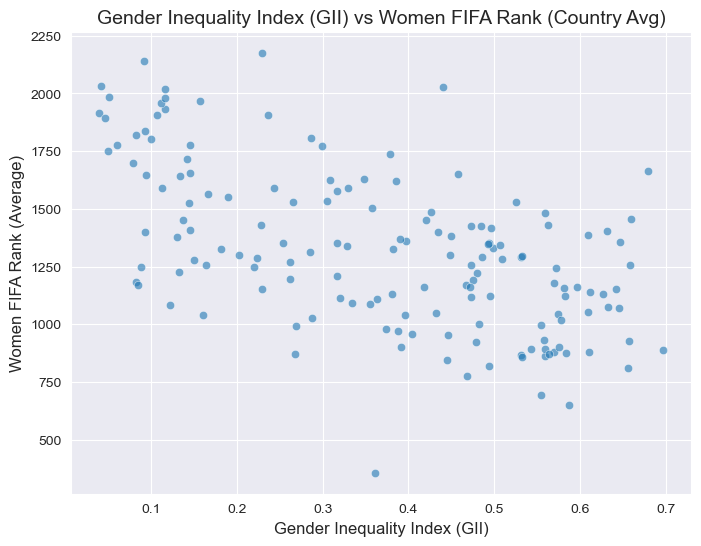

In [31]:
country_gii_women = main_football_data.groupby('country')[['gii', 'women_rank']].mean().dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=country_gii_women, x='gii', y='women_rank', alpha=0.6)
plt.title('Gender Inequality Index (GII) vs Women FIFA Rank (Country Avg)', fontsize=14)
plt.xlabel('Gender Inequality Index (GII)', fontsize=12)
plt.ylabel('Women FIFA Rank (Average)', fontsize=12)
plt.grid(True)
plt.savefig('women gii')

# опа статистика

In [32]:
main_football_data = pd.read_csv("MAIN_football.csv", sep=';', encoding='ISO-8859-1')

for col in main_football_data.columns:
    if main_football_data[col].dtype == 'object':
        try:
            main_football_data[col] = main_football_data[col].str.replace(',', '.').astype(float, errors='ignore')
        except:
            continue

men_data = main_football_data[main_football_data['men_rank'] > 0].copy() 
women_data = main_football_data[main_football_data['women_rank'] > 0].copy() 

men_data_shape = men_data.shape
women_data_shape = women_data.shape

men_data_shape, women_data_shape

((3112, 22), (2263, 22))

In [34]:
desc_stats = pd.DataFrame({
    "Men Rank": men_data["men_rank"].describe(),
    "Women Rank": women_data["women_rank"].describe(),
    "GII (Men)": men_data["gii"].describe(),
    "GII (Women)": women_data["gii"].describe(),
}).T

desc_stats

,count,mean,std,min,25%,50%,75%,max
Men Rank,3112.0,622.019066,418.157326,2.833333,292.147727,531.916667,897.4375,1811.3325
Women Rank,2263.0,1408.965898,332.001205,357.000000,1177.000000,1373.000000,1636.0000,2225.0000
GII (Men),3112.0,0.383856,0.195922,0.013000,0.210000,0.401000,0.5500,0.8220
GII (Women),2263.0,0.340895,0.190496,0.013000,0.156000,0.355000,0.4985,0.7740


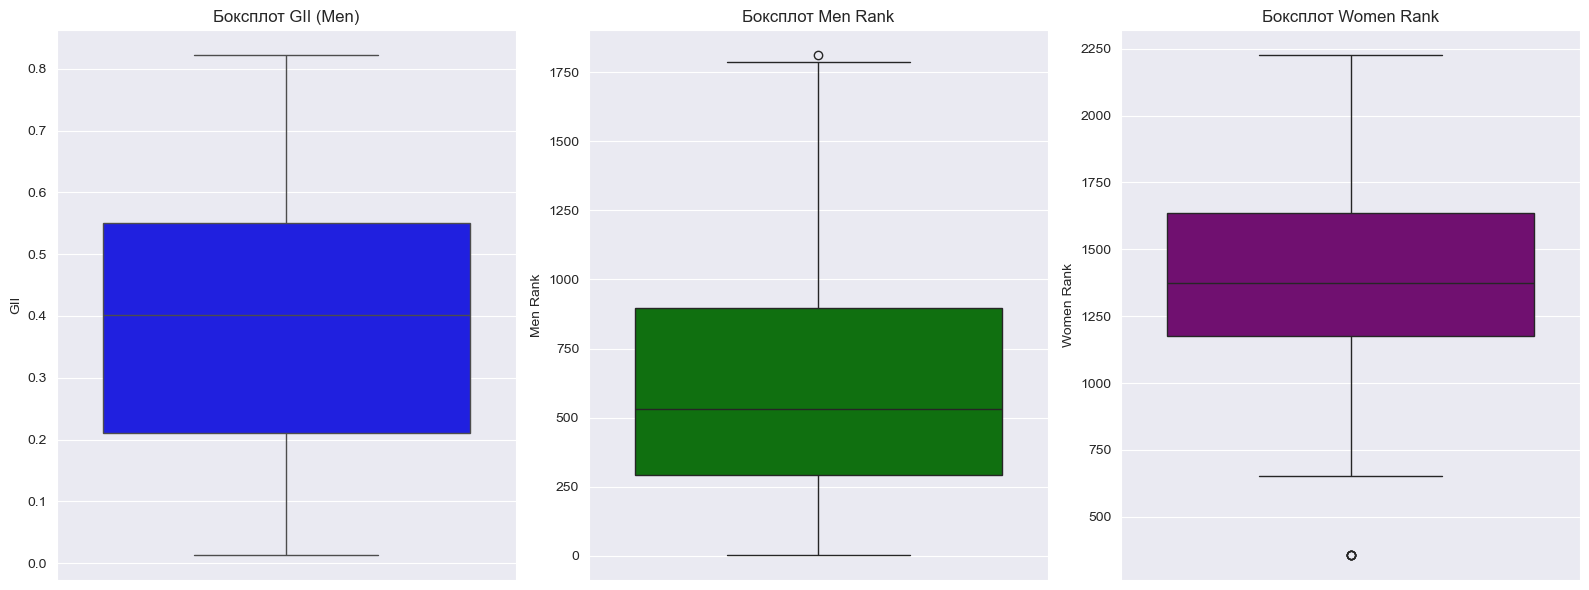

In [35]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=men_data["gii"], color="blue")
plt.title("Боксплот GII (Men)")
plt.ylabel("GII")

plt.subplot(1, 3, 2)
sns.boxplot(y=men_data["men_rank"], color="green")
plt.title("Боксплот Men Rank")
plt.ylabel("Men Rank")

plt.subplot(1, 3, 3)
sns.boxplot(y=women_data["women_rank"], color="purple")
plt.title("Боксплот Women Rank")
plt.ylabel("Women Rank")

plt.tight_layout()
plt.show()


# Регрессия наконец то! (пока за 2021 год)

In [37]:
men_data_2021 = men_data[men_data["year"] == 2021].copy()
women_data_2021 = women_data[women_data["year"] == 2021].copy()

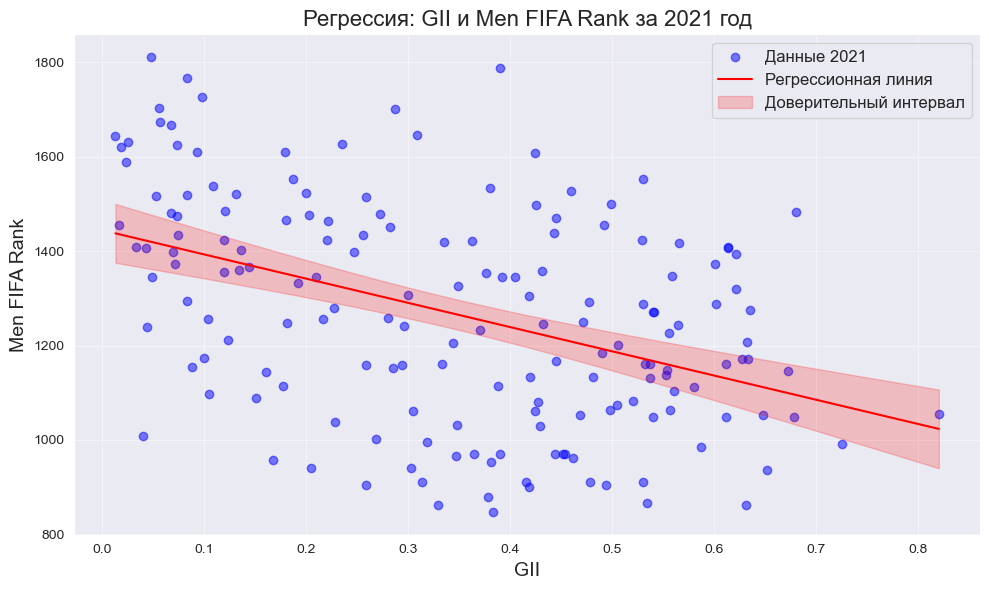

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               men_rank   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     39.17
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           3.12e-09
Time:                        23:14:32   Log-Likelihood:                -1149.4
No. Observations:                 170   AIC:                             2303.
Df Residuals:                     168   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1444.4247     32.533     44.399      0.000    1380.199    1508.650
gii         -513.5383     82.048     -6.259      0.000    -675.516    -351.560
==============================================================================
Omnibus:                        6.694   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                3.366
Skew:                          -0.032   Prob(JB):                        0.186
Kurtosis:                       2.314   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
men_data_2021_shape = men_data_2021.shape
women_data_2021_shape = women_data_2021.shape

X_men_2021 = men_data_2021[["gii"]]
y_men_2021 = men_data_2021["men_rank"]

X_men_2021 = sm.add_constant(X_men_2021)
model_men_2021 = sm.OLS(y_men_2021, X_men_2021).fit()

gii_range_2021 = np.linspace(men_data_2021["gii"].min(), men_data_2021["gii"].max(), 100)
X_pred_2021 = sm.add_constant(pd.DataFrame({"gii": gii_range_2021}))
y_pred_2021 = model_men_2021.predict(X_pred_2021)

plt.figure(figsize=(10, 6))
plt.scatter(men_data_2021["gii"], men_data_2021["men_rank"], alpha=0.5, label="Данные 2021", color="blue")
plt.plot(gii_range_2021, y_pred_2021, color="red", label="Регрессионная линия")
pred_conf_int_2021 = model_men_2021.get_prediction(X_pred_2021).conf_int()
plt.fill_between(
    gii_range_2021,
    pred_conf_int_2021[:, 0],
    pred_conf_int_2021[:, 1],
    color="red",
    alpha=0.2,
    label="Доверительный интервал"
)

plt.title("Регрессия: GII и Men FIFA Rank за 2021 год", fontsize=16)
plt.xlabel("GII", fontsize=14)
plt.ylabel("Men FIFA Rank", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('gii vs men rank 2021')
plt.show()

model_men_2021_summary = model_men_2021.summary()
model_men_2021_summary


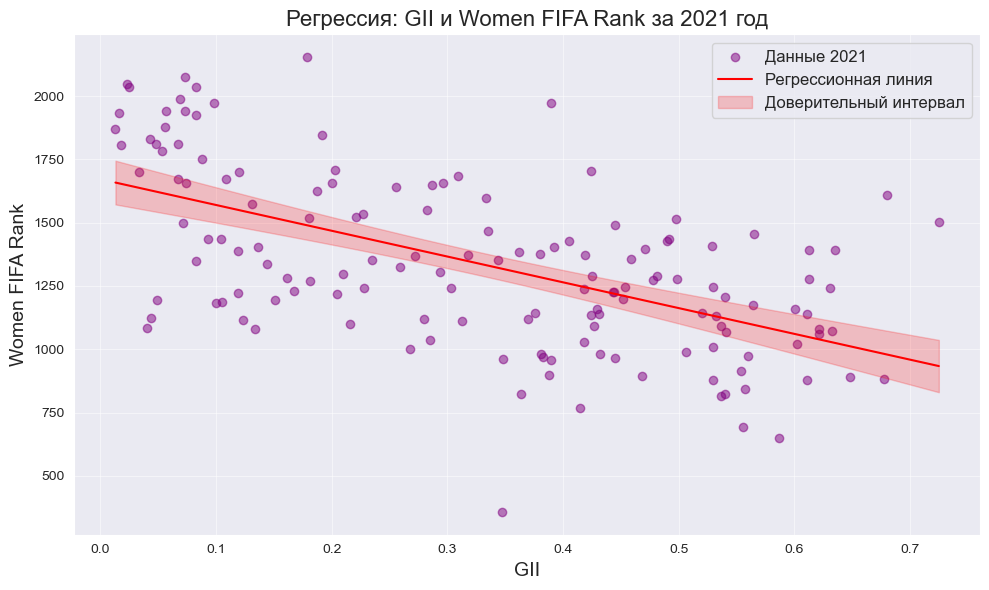

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             women_rank   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     74.41
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.02e-14
Time:                        23:17:33   Log-Likelihood:                -1035.6
No. Observations:                 147   AIC:                             2075.
Df Residuals:                     145   BIC:                             2081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1671.6928     45.014     37.137      0.000    1582.725    1760.660
gii        -1018.2309    118.041     -8.626      0.000   -1251.534    -784.927
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.313
Skew:                          -0.104   Prob(JB):                        0.855
Kurtosis:                       3.090   Cond. No.                         5.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X_women_2021 = women_data_2021[["gii"]]
y_women_2021 = women_data_2021["women_rank"]

X_women_2021 = sm.add_constant(X_women_2021)
model_women_2021 = sm.OLS(y_women_2021, X_women_2021).fit()

gii_range_women_2021 = np.linspace(women_data_2021["gii"].min(), women_data_2021["gii"].max(), 100)
X_pred_women_2021 = sm.add_constant(pd.DataFrame({"gii": gii_range_women_2021}))
y_pred_women_2021 = model_women_2021.predict(X_pred_women_2021)

plt.figure(figsize=(10, 6))
plt.scatter(women_data_2021["gii"], women_data_2021["women_rank"], alpha=0.5, label="Данные 2021", color="purple")
plt.plot(gii_range_women_2021, y_pred_women_2021, color="red", label="Регрессионная линия")
pred_conf_int_women_2021 = model_women_2021.get_prediction(X_pred_women_2021).conf_int()
plt.fill_between(
    gii_range_women_2021,
    pred_conf_int_women_2021[:, 0],
    pred_conf_int_women_2021[:, 1],
    color="red",
    alpha=0.2,
    label="Доверительный интервал"
)

plt.title("Регрессия: GII и Women FIFA Rank за 2021 год", fontsize=16)
plt.xlabel("GII", fontsize=14)
plt.ylabel("Women FIFA Rank", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('women vs women rank 2021')
plt.show()

model_women_2021_summary = model_women_2021.summary()
model_women_2021_summary


## мб полиноминальная

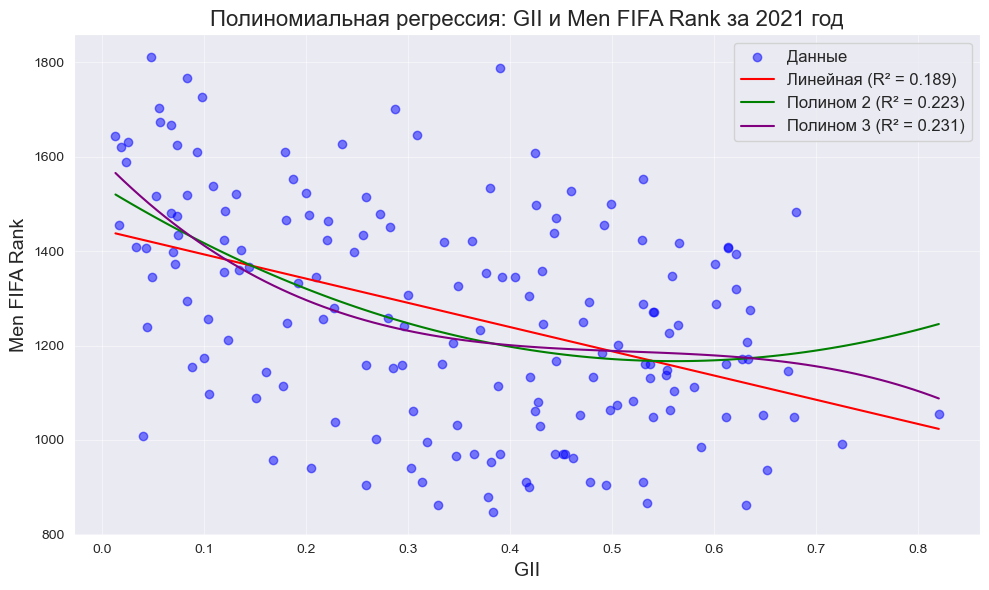

(0.18909120612873698, 0.223340709343405, 0.23131044650126187)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def polynomial_regression(degree, X, y, color, label):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    r2 = r2_score(y, y_pred)

    gii_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    gii_poly_range = poly.transform(gii_range)
    y_pred_range = model.predict(gii_poly_range)

    plt.plot(gii_range, y_pred_range, color=color, label=f'{label} (R² = {r2:.3f})')
    return r2

X_men_2021 = men_data_2021[["gii"]].values
y_men_2021 = men_data_2021["men_rank"].values

plt.figure(figsize=(10, 6))
plt.scatter(X_men_2021, y_men_2021, alpha=0.5, label="Данные", color="blue")

r2_linear = polynomial_regression(1, X_men_2021, y_men_2021, color="red", label="Линейная")

r2_poly2 = polynomial_regression(2, X_men_2021, y_men_2021, color="green", label="Полином 2")

r2_poly3 = polynomial_regression(3, X_men_2021, y_men_2021, color="purple", label="Полином 3")

plt.title("Полиномиальная регрессия: GII и Men FIFA Rank за 2021 год", fontsize=16)
plt.xlabel("GII", fontsize=14)
plt.ylabel("Men FIFA Rank", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('women polinom')
plt.show()

r2_linear, r2_poly2, r2_poly3


##  интересно насколько лучше станет график если удалить этот маврикий

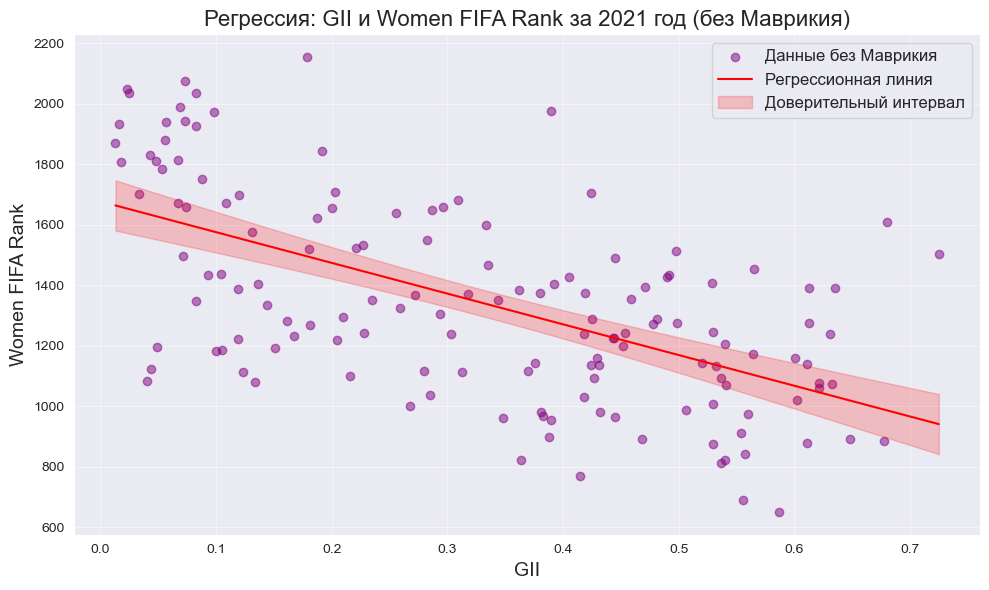

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             women_rank   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     79.98
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.69e-15
Time:                        23:29:25   Log-Likelihood:                -1022.7
No. Observations:                 146   AIC:                             2049.
Df Residuals:                     144   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1677.1791     43.299     38.734      0.000    1591.594    1762.764
gii        -1014.8766    113.479     -8.943      0.000   -1239.177    -790.576
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.131
Skew:                           0.130   Prob(JB):                        0.344
Kurtosis:                       2.468   Cond. No.                         5.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
women_data_2021_no_mauritius = women_data_2021[women_data_2021["country"] != "Mauritius"].copy()

X_women_no_mauritius = women_data_2021_no_mauritius[["gii"]]
y_women_no_mauritius = women_data_2021_no_mauritius["women_rank"]

X_women_no_mauritius = sm.add_constant(X_women_no_mauritius)
model_women_no_mauritius = sm.OLS(y_women_no_mauritius, X_women_no_mauritius).fit()

gii_range_no_mauritius = np.linspace(women_data_2021_no_mauritius["gii"].min(), women_data_2021_no_mauritius["gii"].max(), 100)
X_pred_no_mauritius = sm.add_constant(pd.DataFrame({"gii": gii_range_no_mauritius}))
y_pred_no_mauritius = model_women_no_mauritius.predict(X_pred_no_mauritius)

plt.figure(figsize=(10, 6))
plt.scatter(women_data_2021_no_mauritius["gii"], women_data_2021_no_mauritius["women_rank"], alpha=0.5, label="Данные без Маврикия", color="purple")
plt.plot(gii_range_no_mauritius, y_pred_no_mauritius, color="red", label="Регрессионная линия")
pred_conf_int_no_mauritius = model_women_no_mauritius.get_prediction(X_pred_no_mauritius).conf_int()
plt.fill_between(
    gii_range_no_mauritius,
    pred_conf_int_no_mauritius[:, 0],
    pred_conf_int_no_mauritius[:, 1],
    color="red",
    alpha=0.2,
    label="Доверительный интервал"
)

plt.title("Регрессия: GII и Women FIFA Rank за 2021 год (без Маврикия)", fontsize=16)
plt.xlabel("GII", fontsize=14)
plt.ylabel("Women FIFA Rank", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("without mauritius")
plt.show()

model_women_no_mauritius_summary = model_women_no_mauritius.summary()
model_women_no_mauritius_summary


ого авыхахыхваы стало сильно лучше кажется